# Breast cancer 

In [1]:
#import SparkSession
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('breastcancer').getOrCreate()

In [3]:
#read the dataset
df = spark.read.csv('breast_cancer_clean.csv', inferSchema=True, header=True)#view five records
df.show(5)

+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|_c0|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---+---------+-----------+------------+--------------+---

In [4]:
#print dataframe columns and count
print(df.columns)
print(df.count())

['_c0', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
569


In [5]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- rad

In [6]:
# We can see there is no null value for age column.
df.filter(df['diagnosis'].isNull()).show()

+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|_c0|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---+---------+-----------+------------+--------------+---

In [7]:
import pandas as pd
import numpy as np
df = df.toPandas()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _c0                      569 non-null    int32  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
diagnosis_all = list(df.shape)[0]
diagnosis_categories = list(df['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


In [9]:
features_mean= list(df.columns[1:11])

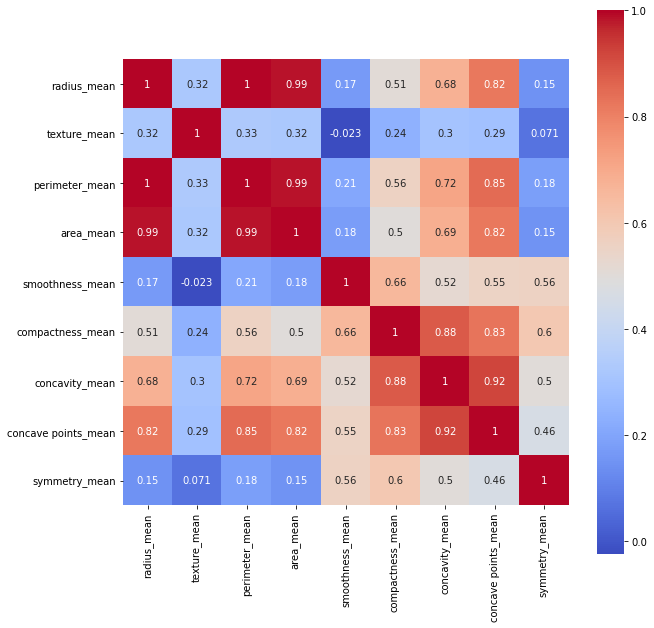

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

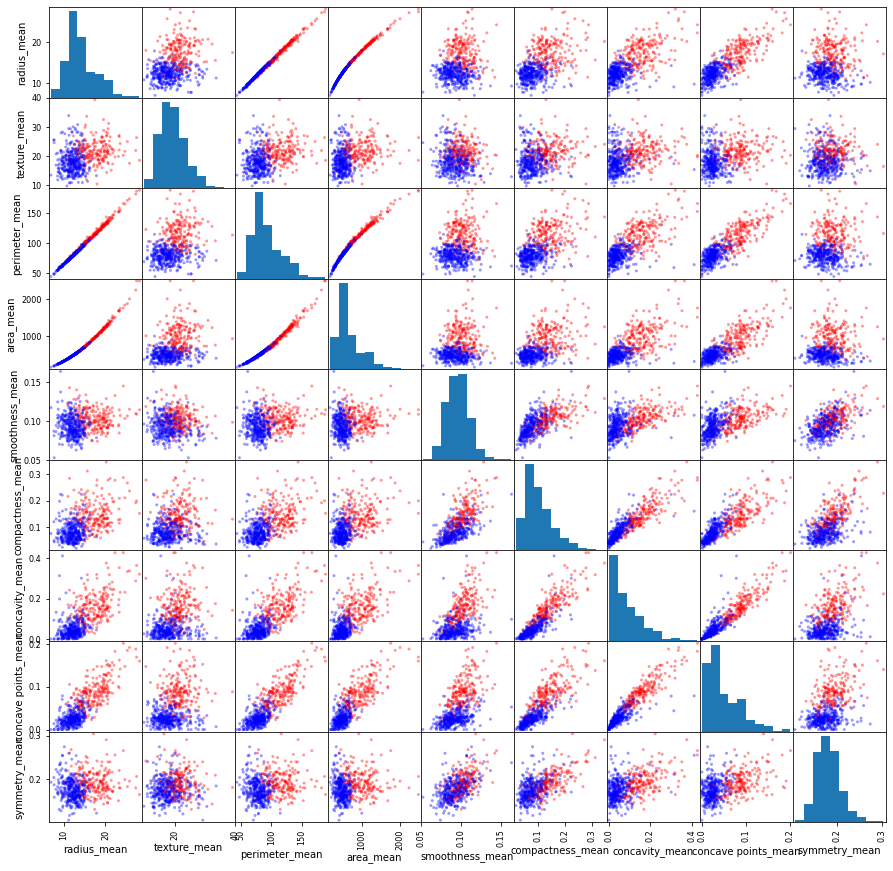

In [11]:
from pandas.plotting import scatter_matrix
color_dic = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = scatter_matrix(df[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

# Spark-ML

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import time
df.head(1)

,_c0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [13]:
X = df.drop(['_c0','diagnosis'], axis= 1)
y = df.diagnosis

#Standardize Data
scaler = StandardScaler()
X=StandardScaler().fit_transform(X.values)
X = pd.DataFrame(X)
X.columns=(df.drop(['_c0','diagnosis'], axis= 1)).columns

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [15]:
#Standardize Data
scaler = StandardScaler()

#Fit on training set only.
scaler.fit(X_train)

#Apply transform to both the training and test set
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
from sklearn.decomposition import PCA
#  Feature Extraction:  Principal Component Analysis: PC1, PC2
pca = PCA(n_components=2, random_state=42) 
# Only fit to the training set
pca.fit((X_train))
# transform with PCA model from training
principalComponents_train = pca.transform(X_train)
principalComponents_test = pca.transform(X_test)

# Use Pandas DataFrame
X_train = pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_train.columns=(df.drop(['_c0','diagnosis'], axis= 1)).columns
X_test.columns=(df.drop(['_c0','diagnosis'], axis= 1)).columns
y_train = pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

X_train['PC1']=principalComponents_train[:,0]
X_train['PC2']=principalComponents_train[:,1]
X_test['PC1']=principalComponents_test[:,0]
X_test['PC2']=principalComponents_test[:,1]

tr_features=X_train
tr_labels=y_train

val_features = X_test
val_labels=y_test



In [17]:
print('X_train - length:',len(X_train), 'y_train - length:',len(y_train))
print('X_test - length:',len(X_test),'y_test - length:',len(y_test))
print('Percent heldout for testing:', round(100*(len(X_test)/len(df)),0),'%')

X_train - length: 455 y_train - length: 455
X_test - length: 114 y_test - length: 114
Percent heldout for testing: 20.0 %


In [32]:
#### make sure the data types are correct ####
from pyspark.sql.types import FloatType, StringType, IntegerType, DoubleType, ArrayType
for col in data.columns:
    if col not in ['_c0','diagnosis']:
        data = data.withColumn(col,data[col].cast(FloatType()))

In [33]:
data = data.withColumn('diagnosis',F.when(data.diagnosis=='M',1).otherwise(0))
data.toPandas().head(3)

,_c0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,17.990000,10.38,122.800003,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.379999,17.330000,184.600006,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,1,20.570000,17.77,132.899994,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.990000,23.410000,158.800003,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,1,19.690001,21.25,130.000000,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.570000,25.530001,152.500000,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [35]:
from pyspark import AccumulatorParam
from pyspark import Broadcast

class DictAccumulatorParam(AccumulatorParam):
    def zero(self,initialValue):
        return initialValue

    def addInPlace(self, v1, v2):
        v1.update(v2)
        return v1
    
    
def test_zero_variance(d,acc):
    global df_pd
    col = d[0]
    value = d[1]
    try:
        mean = df_pd.value['mean'][col]
        std = df_pd.value['stddev'][col]
        if float(value)==float(mean) and float(std)==0.0:
            acc.add({col:True})
            return True
        else:
            acc.add({col:False})
            return False
    except KeyError:
        acc.add({col:False})
        return False
    
    
def count_labels(row):
    global benign, malignant
    if row.label==1:
        malignant.add(1)
    else:
        benign.add(1)

In [38]:
df_pd = data.toPandas()
df_pd.index = df_pd["diagnosis"]
del df_pd["diagnosis"]
df_pd = df_pd.transpose()

df_pd = sc.broadcast(df_pd)

In [39]:
acc = sc.accumulator({}, DictAccumulatorParam())  
values = data.first().asDict()
input_value = sc.parallelize(values.items())
dummy = input_value.map(lambda x:test_zero_variance(x,acc))\
                  .map(lambda x:(x,1))\
                  .reduceByKey(lambda x,y:x+y)
dummy_collect = dummy.collect()

In [40]:
acc.value

{'perimeter_mean': False,
 'area_mean': False,
 'smoothness_mean': False,
 'compactness_mean': False,
 'symmetry_se': False,
 'fractal_dimension_se': False,
 'radius_worst': False,
 'texture_worst': False,
 '_c0': False,
 'diagnosis': False,
 'radius_mean': False,
 'texture_mean': False,
 'perimeter_worst': False,
 'area_worst': False,
 'smoothness_worst': False,
 'compactness_worst': False,
 'radius_se': False,
 'texture_se': False,
 'perimeter_se': False,
 'area_se': False,
 'smoothness_se': False,
 'compactness_se': False,
 'concavity_se': False,
 'concave points_se': False,
 'concavity_worst': False,
 'concave points_worst': False,
 'symmetry_worst': False,
 'fractal_dimension_worst': False,
 'concavity_mean': False,
 'concave points_mean': False,
 'symmetry_mean': False,
 'fractal_dimension_mean': False}

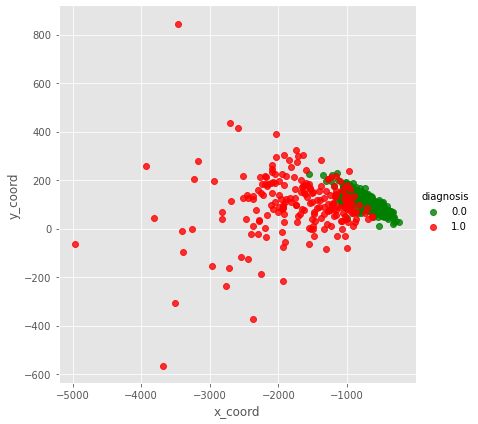

In [67]:
###### PCA Visualize data ######
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import UserDefinedFunction
from pyspark.ml.feature import VectorAssembler 

import regex

def g(point,co_ord):
    if co_ord=='x':
        value = regex.split('\s+',point)[0][1:]
    else:
        
        value =  regex.split('\s+',point)[1][:-1]
    return value

feature_cols = list(filter(lambda x:x not in ['_c0','label','dummy'],data.columns))
assembler = VectorAssembler(inputCols=feature_cols,outputCol='features')
df = assembler.transform(data)

pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df)

pca_result = model.transform(df)
result = pca_result.select("pcaFeatures")

get_x_coord = UserDefinedFunction(lambda point:g(point,'x'), StringType())
get_y_coord = UserDefinedFunction(lambda point:g(point,'y'), StringType())
convert_to_string = UserDefinedFunction(lambda point:str(point.toArray()),StringType())

pca_result = pca_result.withColumn('pcaFeatures_string',convert_to_string(pca_result['pcaFeatures']))
pca_result = pca_result.withColumn('x_coord',get_x_coord(pca_result['pcaFeatures_string']))\
                       .withColumn('y_coord',get_y_coord(pca_result['pcaFeatures_string']))\
                      
pca_result = pca_result.withColumn('x_coord',pca_result.x_coord.cast(FloatType()))\
                       .withColumn('y_coord',pca_result.y_coord.cast(FloatType()))
    
viz_df = pca_result.select('x_coord','y_coord','diagnosis').toPandas()
a = sns.lmplot(x='x_coord',y='y_coord',hue='diagnosis',data=viz_df,
           fit_reg=False,palette={1:'red',0:'green'},height=6,aspect=1)

In [73]:
# split the data for machine learning 
data = data.withColumn('diagnosis',data['diagnosis'].cast(DoubleType()))
train, test = data.randomSplit([0.7,0.3])
train.count(), test.count()

(412, 157)

In [74]:
#### Classification metrics ####
def calc_metrics(results):
    metrics = {}
    metrics['tp_0'] = results.filter((results.label==0)&(results.prediction==0)).count()
    metrics['fn_0'] = results.filter((results.label==0)&(results.prediction==1)).count()
    metrics['tn_0'] = results.filter((results.label==1)&(results.prediction==1)).count()
    metrics['fp_0'] = results.filter((results.label==1)&(results.prediction==0)).count()
    
    metrics['tp_1'] = results.filter((results.label==1)&(results.prediction==1)).count()
    metrics['fn_1'] = results.filter((results.label==1)&(results.prediction==0)).count()
    metrics['tn_1'] = results.filter((results.label==0)&(results.prediction==0)).count()
    metrics['fp_1'] = results.filter((results.label==0)&(results.prediction==1)).count()
    
    return metrics
        
### calc precision & recall ###
def precision_recall(results):
    items = calc_metrics(results)
    pre_0 = items['tp_0']/float((items['tp_0']+items['fp_0']))
    pre_1 = items['tp_1']/float((items['tp_1']+items['fp_1']))
    
    recall_0 = items['tp_0']/float((items['tp_0']+items['fn_0']))
    recall_1 = items['tp_1']/float((items['tp_1']+items['fn_1']))
    
    return {'pre_0':pre_0, 'recall_0':recall_0,'pre_1':pre_1,'recall_1':recall_1}

In [75]:
from pyspark.ml.pipeline import Pipeline

In [76]:
from pyspark.ml.linalg import Vectors #linear algebra package, has matrices, arrays, Vectors (dense and sparse)
from pyspark.ml.feature import VectorAssembler 

feature_cols = list(filter(lambda x:x not in ['_c0','diagnosis'],data.columns))
assembler = VectorAssembler(inputCols=feature_cols,outputCol='features')

In [77]:
from pyspark.ml.classification import LogisticRegression

#define estimator and fit data
estimator = LogisticRegression()
pipeline = Pipeline(stages=[assembler,estimator])
lr_model = pipeline.fit(train)

#get results
results = lr_model.transform(test)
precision_recall(results)

IllegalArgumentException: label does not exist. Available: _c0, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, features